# Instalação da biblioteca Yahoo Finance (yfinance)

In [641]:
! pip install yfinance

# Importações necessárias

In [642]:
import pandas as pd                 # Manipulacao de DataFrames
import numpy as np                  # Operacoes matematicas
import yfinance as yf               # Para obter dados financeiros
import plotly.express as px         # Plotagem de graficos iterativos
from scipy import stats             # Funcoes estatisticas

# Download dos dados financeiros

In [643]:
# Lista com o nome dos ativos.
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

# Cria um DataFrame vazio, para alocar os dados dos ativos.
acoes_df = pd.DataFrame()

# Para cada acao (string) na lista de ativos.
for acao in acoes:
    # Baixa os dados de fechamento do ativo e adiciona no DataFrame acoes_df.
    acoes_df[acao] = yf.download(acao, start='2020-01-01')['Close']

# Renomeia o nome das colunas dos ativos.
acoes_df = acoes_df.rename(
    columns={
        'GOLL4.SA' : 'GOL',
        'CVCB3.SA' : 'CVC',
        'WEGE3.SA' : 'WEG',
        'MGLU3.SA' : 'MGLU',
        'TOTS3.SA' : 'TOTS',
        'BOVA11.SA' : 'BOVA',
    }
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Escrita e leitura dos dados financeiros baixados.

In [644]:
# Remove valores que estão faltando no DataFrame.
acoes_df.dropna(inplace=True)

# Salva o DataFrame no formato CSV.
acoes_df.to_csv('dataset.csv')

# Le o arquivo csv e cria um DataFrame e salva na variavel dataset.
dataset = pd.read_csv('dataset.csv')

# Cria uma copia do dataset.
dataset_copy = dataset.copy()

# Taxa de Retorno

## Taxa de Retorno simples

>## TR = (PF - PI) / PI
>
>**TR**: Taxa de retorno.
>
>**PI**: Preço inicial.
>
>**PF**: Preço final.
>

Cálculo da `taxa de retorno` da **GOL** (%).

In [645]:
preco_inicial = dataset['GOL'][0]
preco_final = dataset['GOL'][len(dataset) - 1]

taxa_de_retorno = ((preco_final - preco_inicial) / preco_inicial) * 100

print(
    f"""
    Preco inicial: {preco_inicial}
    Preco final: {preco_final}
    Taxa de retorno: {taxa_de_retorno}
    """
)


    Preco inicial: 37.16999816894531
    Preco final: 10.619999885559082
    Taxa de retorno: -71.42857032898148
    


## Taxa de Retorno diária

>## TRD = (PA / PS) - 1
>
>**TRD**: Taxa de retorno diária.
>
>**PA**: Preço do dia atual.
>
>**PS**: Preço do dia seguite (`.shif(1)`).
>

In [646]:
dataset['GOL']

0      37.169998
1      35.900002
2      34.250000
3      34.450001
4      35.810001
         ...    
641     8.370000
642     8.710000
643    10.000000
644     9.980000
645    10.620000
Name: GOL, Length: 646, dtype: float64

O método `.shift(n)` desloca os valores (dos ativos) em `n` períodos.

In [647]:
dataset['GOL'].shift(1)

0            NaN
1      37.169998
2      35.900002
3      34.250000
4      34.450001
         ...    
641     8.540000
642     8.370000
643     8.710000
644    10.000000
645     9.980000
Name: GOL, Length: 646, dtype: float64

Cálculo da `taxa de retorno diária` da **GOL** (%).

In [648]:
dataset['RS GOL'] = ((dataset['GOL'] / dataset['GOL'].shift(1)) - 1) * 100

Cálculo da `taxa de retorno diária` da **WEG** (%).

In [649]:
dataset['RS WEG'] = ((dataset['WEG'] / dataset['WEG'].shift(1)) - 1) * 100

### Dia de `maior` retorno diário da **GOL**.

In [650]:
dataset[dataset['RS GOL'] >= dataset['RS GOL'].max()]

,Date,GOL,CVC,WEG,MGLU,TOTS,BOVA,RS GOL,RS WEG
57,2020-03-25,10.94,8.797598,18.68,10.0,18.333332,71.730003,35.061717,3.6051


### Dia de `menor` retorno diário da **GOL**.

In [651]:
dataset[dataset['RS GOL'] <= dataset['RS GOL'].min()]

,Date,GOL,CVC,WEG,MGLU,TOTS,BOVA,RS GOL,RS WEG
48,2020-03-12,9.97,12.834144,16.5,8.5,17.083332,70.099998,-36.293926,-15.816328


## Volatilidade diária

<AxesSubplot:title={'center':'Volatilidade diaria (GOL)'}>

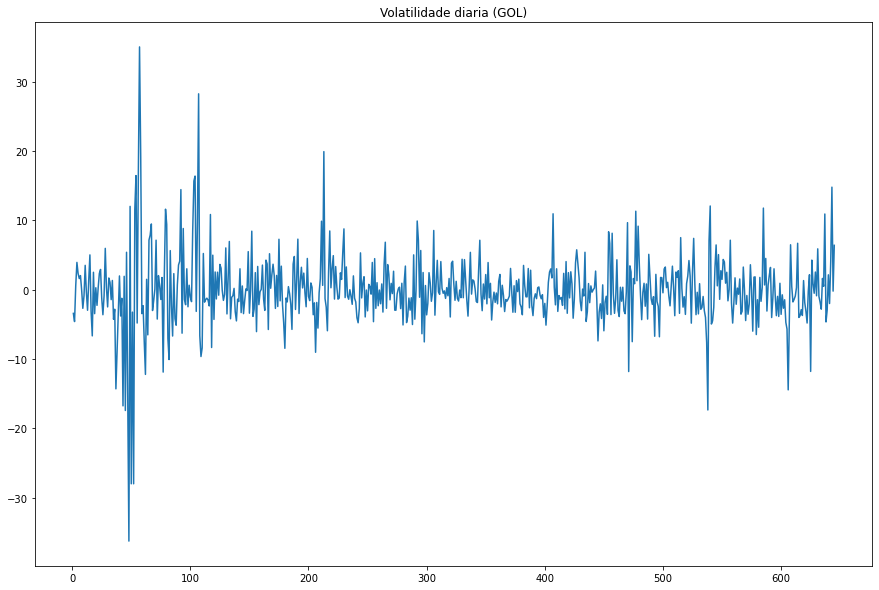

In [652]:
dataset['RS GOL'].plot(figsize= (15, 10), title='Volatilidade diaria (GOL)')

Volatilidade GOL vs WEG

<AxesSubplot:>

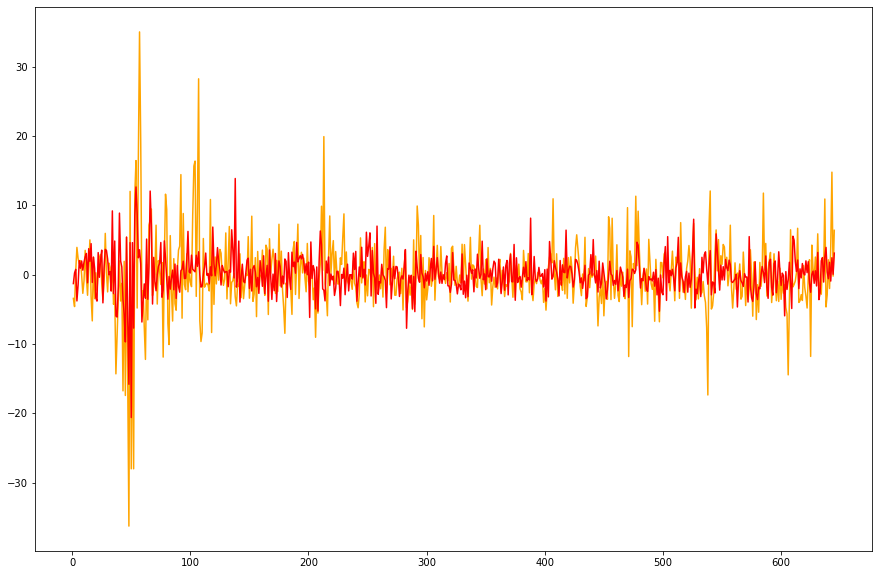

In [653]:
dataset['RS GOL'].plot(figsize=(15, 10), c='orange')
dataset['RS WEG'].plot(figsize=(15, 10), c='red')

## Taxa de retorno média

Taxa de retorno média `diária` da **GOL** (%).

In [654]:
dataset['RS GOL'].mean()

-0.052095825251451636

Taxa de retorno média `anual` da **GOL** (%). Multiplica a taxa de retorno média pelo número de dias que o mercado fica aberto no ano (aproximadamente **242** ou **246** dias).


In [655]:
dataset['RS GOL'].mean() * 246

-12.815573011857103

## Taxa de retorno logarítimica

>## TR_log = log(PF / PI)
>
>**TR_log**: Taxa de retorno logarítimica.
>
>**PI**: Preço inicial.
>
>**PF**: Preço final.
>

Cálculo da `taxa de retorno logarítimica` da **GOL** (%).

In [656]:
preco_inicial = dataset['GOL'][0]
preco_final = dataset['GOL'][len(dataset) - 1]

taxa_de_retorno = preco_final / preco_inicial

taxa_de_retorno_log = np.log(taxa_de_retorno) * 100
taxa_de_retorno_log

-125.27629300097205

Cálculo da `taxa de retorno logarítimica diária` da **GOL** (%).

In [657]:
dataset['RL GOL'] = np.log(dataset['GOL'] / dataset['GOL'].shift(1)) * 100

<AxesSubplot:title={'center':'Taxa de retorno logarítimica diária (GOL)'}>

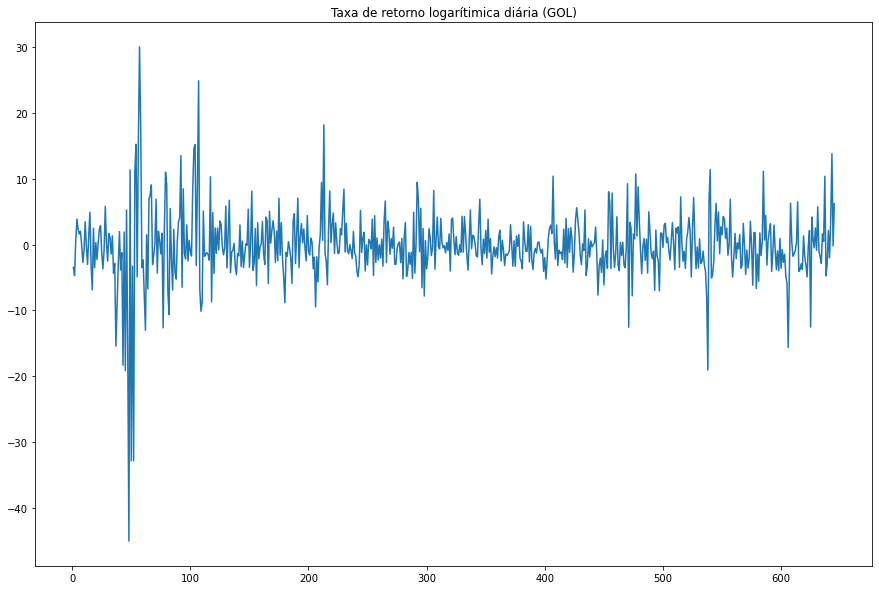

In [658]:
dataset['RL GOL'].plot(figsize= (15, 10), title='Taxa de retorno logarítimica diária (GOL)')

# Estudos de risco

O método `.tail(n)` pega os ultimas `(n)` linhas (dias) do DataFrame. Para pegar os dados do ultimo ano: `n = 246`.

`Média` dos valores do ultimo ano da **GOL**.

In [659]:
media = dataset['GOL'].tail(246).mean()
media

15.730406513059043

`Variância` dos valores do ultimo ano da **GOL**.

In [660]:
variancia = dataset['GOL'].tail(246).var()
variancia

12.968099639786432

`Desvio padrão` dos valores do ultimo ano da **GOL**.

In [661]:
desvio_padrao = dataset['GOL'].tail(246).std()
desvio_padrao

3.6011247742596244

## Coeficiente de Variação

>Coeficiente de Variação = (Desvio padrão / Média)

Coeficiente de variação do ultimo ano da **GOL** (%).

In [662]:
media = dataset['GOL'].tail(246).mean()
desvio_padrao = dataset['GOL'].tail(246).std()

coeficiente_de_variacao = (desvio_padrao / media) * 100
coeficiente_de_variacao

22.892763586688293

Coeficiente de variação da biblioteca **Scipy** do ultimo ano da **GOL** (%).

In [663]:
coeficiente_de_variacao = stats.variation(dataset['GOL'].tail(246)) * 100
coeficiente_de_variacao

22.846186196449658

## Taxa de retorno de todos os ativos

Remove a coluna de datas (`Date`), para o calculo da taxa de retorno de todos os ativos.

In [664]:
dataset.drop(labels=["Date"], axis=1, inplace=True)

In [665]:
taxa_de_retorno = (dataset / dataset.shift(1)) - 1

## Desvio padrão da taxa de retorno anual

In [666]:
taxa_de_retorno_std = taxa_de_retorno.std() * 246
taxa_de_retorno_std

GOL       12.995811
CVC       13.137074
WEG        7.092901
MGLU      10.430580
TOTS       7.603022
BOVA       4.919700
RS GOL          NaN
RS WEG          NaN
RL GOL          NaN
dtype: float64

# Alocação de portifólio

In [667]:
# Dataset sem as alteracoes das secoes anteriores.
dataset = dataset_copy

O número de `seeds` é o número de ativos. Ele pode ser calculado como o número de colunas menos um (a coluna de datas).

> Outra maneira de calcular o número de seeds é usando a operação de slice:
>```python	
>seed = len(dataset.columns[1:])
>```
> Desse modo, a coluna de datas será pulada.

In [668]:
seed = len(dataset.columns) - 1
seed

6

É possivel acessar o valor mais recente do ativo (preço final) de duas maneiras:

In [669]:
preco_final_1 = dataset['GOL'][len(dataset) - 1]
preco_final_2 = dataset.loc[len(dataset) - 1]['GOL']

print(
    f"""
    Metodo 1: {preco_final_1}
    Metodo 2: {preco_final_2}
    Valores iguais? {"Sim" if preco_final_1 == preco_final_2 else "Nao"}
    """
)


    Metodo 1: 10.619999885559082
    Metodo 2: 10.619999885559082
    Valores iguais? Sim
    


Criando `pesos` a partir da `seed`:

In [670]:
pesos = np.random.random(seed)

print(
    f"""
    Pesos: {pesos}
    Numero de pesos: {len(pesos)}
    Soma dos pesos: {pesos.sum()}
    """
)


    Pesos: [0.92572947 0.80090942 0.17947852 0.44532764 0.7287506  0.82388285]
    Numero de pesos: 6
    Soma dos pesos: 3.9040784959374504
    


Para deixar o a `soma dos pesos igual a 1.0`, é preciso normalizar os pesos (deixar os valores entre 0.0 e 1.0).

> Pesos normalizados = Pesos / Soma dos pesos
>

In [671]:
pesos = pesos / pesos.sum()

print(
    f"""
    Pesos: {pesos}
    Numero de pesos: {len(pesos)}
    Soma dos pesos: {pesos.sum()}
    """
)


    Pesos: [0.23711856 0.20514685 0.04597206 0.11406729 0.18666392 0.21103132]
    Numero de pesos: 6
    Soma dos pesos: 1.0
    


Para pegar apenas as colunas dos ativos, sem a coluna de datas (indice 0), é possível fazer uma operação de fatiamento de listas (slice): `lista[:]`, `lista[index:]` ou `lista[:index]`.

> ```python 
># Valores de todos os indices (0, 1, 2, 3, ..., n).
>dataset.columns[:]
>
># Valores do indice 1 em diante (1, 2, 3, ..., n).
>dataset.columns[1:]
>
># Valores do indice 0 ao indice 6-1 (0, 1, 2, ..., 5).
>dataset.columns[:6]
>```

In [672]:
acoes = dataset.columns[1:]
acoes

Index(['GOL', 'CVC', 'WEG', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

## Valor de retorno

O valor de retorno é o `valor atual dividido pelo preço inicial do ativo`.

In [673]:
for acao in acoes:
    preco_inicial = dataset[acao][0]
    dataset[acao] = (dataset[acao] / preco_inicial)

## Análise da evolução do lucro

Dinheiro total investido:

In [674]:
dinheiro_total = 5000

Evolução do lucro = Valores do ativo * Peso referente ao ativo * Dinheiro total investido

In [675]:
for index, acao in enumerate(acoes):
    dataset[acao] = dataset[acao] * pesos[index] * dinheiro_total

## Alocação aleatória de ativos

In [676]:
def alocacao_de_ativos(dataset, dinheiro_total, seed=0, melhores_pesos=[]):

    # Copia do dataset original.
    dataset = dataset.copy()

    if seed != 0:
        np.random.random(seed)
    
    # Se tiver pesos na lista melhores_pesos, usa eles.
    if len(melhores_pesos) > 0:
        pesos = melhores_pesos
    
    # Se a lista melhores_pesos estiver vazia, gera novos pesos.
    else:
        # Gera uma nova seed.
        seed = len(dataset.columns[1:])

        # Gera novos pesos a partir da seed.
        pesos = np.random.random(seed)

        # Normalizacao dos pesos (valoes entre 0.0 e 1.0)
        pesos = pesos / pesos.sum()
    
    # Colunas dos ativos.
    acoes = dataset.columns[1:]

    # Valor de retorno: Valor atual dividido pelo preco inicial do ativo.
    for acao in acoes:
        preco_inicial = dataset[acao][0]
        dataset[acao] = dataset[acao] / preco_inicial

    # Analise de evolucao do lucro.
    for index, acao in enumerate(acoes):
        dataset[acao] = dataset[acao] * pesos[index] * dinheiro_total

    # Soma todos os valores de cada ativo. 
    # numeric_only=True evita somar valores numericos com strings.
    # axis=1 quer dizer que a soma sera feita por colunas (primeira linha da GOL 
    # + primeira linha da WEG + ... + primeira linha da ultima coluna. O mesmo acontece 
    # para as outras linhas).
    dataset['Soma valor'] = dataset.sum(numeric_only=True, axis=1)
    
    # Salva as datas em uma variavel.
    datas = dataset['Date']

    # Remove as datas do dataset. 
    # axis=1 remove a coluna com a label Date.
    # inplace=True faz a alteracao diretamente no dataset, sem retornar uma copia do dataset 
    # com as modificacoes.
    dataset.drop(labels=['Date'], axis=1, inplace=True)

    # Cria uma coluna para a taxa de retorno com valores iguais a 0.0.
    dataset['Taxa retorno'] = 0.0

    # Calculo da taxa de retorno diaria (%).
    for i in range(1, len(dataset)):
        dataset['Taxa retorno'][i] = ((dataset['Soma valor'][i] / dataset['Soma valor'][i - 1]) - 1) * 100
        
    acoes_pesos = pd.DataFrame(data={'Acoes': acoes, 'Pesos': pesos * 100})

    # Dicionario com os dados que serao retornados.
    dados = {
        'dataset': dataset,
        'datas': datas,
        'acoes_pesos': acoes_pesos,
        'soma_valor': dataset['Soma valor'][len(dataset) - 1], # Valor mais recente.
    }

    return dados

In [677]:
# Le o arquivo csv e cria um DataFrame e salva na variavel dataset.
dataset = pd.read_csv('dataset.csv')

# Faz a alocacao aleatoria de ativos.
dados = alocacao_de_ativos(dataset=dataset, dinheiro_total=5000)

# Extai dos dados retornados para variaveis.
dataset, datas, acoes_pesos, soma_valor = (
    dados['dataset'],
    dados['datas'],
    dados['acoes_pesos'],
    dados['soma_valor'],
)

## Retorno

In [678]:
figura = px.line(x=datas, y=dataset['Taxa retorno'], title='Retorno')
figura.show()

## Evolução do patrimônio

In [679]:
# Remove as colunas Soma valor e Taxa retorno.
acoes = dataset.drop(columns=['Soma valor', 'Taxa retorno']).columns

figura = px.line(title='Evolucao do patrtimonio')

for acao in acoes:
    figura.add_scatter(x=datas, y=dataset[acao], name=acao)

figura.show()

In [680]:
figura = px.line(x=datas, y=dataset['Soma valor'], title='Evolucao do patrimonio')
figura.show()